In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython
import imageio
import os

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [2]:
t_max = 5000
dt = .01
lam = 0.1931833275037836
N = 48

In [3]:
def init(N):
    #r0 = np.random.uniform(-.2, .2, size=(N,3))
    r0 = np.zeros([N, 3])
    for i in range(N):
        r0[i] = np.array([0.3*i+.1, 0, 0])
    
    p0 = np.random.normal(loc=0.0, scale=np.sqrt(0.1), size=(N,3))
    #p0 = np.zeros([N,3])
    
    return r0, p0

In [20]:
def calc_energy(r, p, K=1, rmax=1):
    
    T = .5 * np.linalg.norm(p)**2
    
    V = -(.5 * K * rmax * np.log(1 - np.linalg.norm(r[1:]-r[:-1], axis=1)**2 / rmax**2)).sum()
        
    return T + V

In [5]:
r0, p0 = init(N=N)

In [6]:
R, P, t = a.velocity_verlet_Ndim(r0.copy(), p0.copy(), t_max, dt, f.FENE_force, thermal_noise=True, 
                      periodic=None)

100%|██████████| 499999/499999 [17:41<00:00, 471.22it/s]


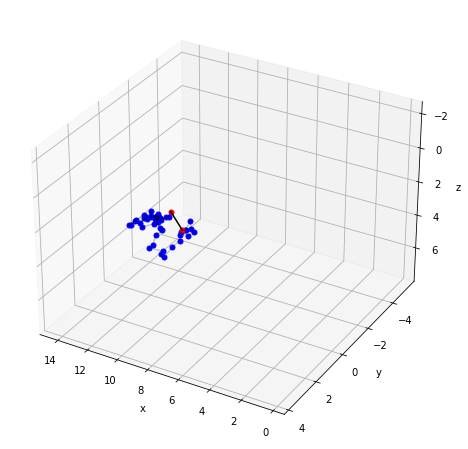

In [7]:
xlim = (R[:,:,0].max(), R[:,:,0].min())
ylim = (R[:,:,1].max(), R[:,:,1].min())
zlim = (R[:,:,2].max(), R[:,:,2].min())
files = []
for i in range(len(t)):
    
    if i%112343==0:
        plt.clf()
        fig = plt.figure(figsize=(12,8));
        ax = fig.add_subplot(111, projection='3d')
        for point_i, point in enumerate(R[i]):
            if point_i==0:
                ax.plot(point[0], point[1], point[2], color='red', linestyle='', marker='o', markersize=5)
            elif point_i == N-1:
                ax.plot(point[0], point[1], point[2], color='red', linestyle='', marker='o', markersize=5)
            else:
                ax.plot(point[0], point[1], point[2], color='blue', linestyle='', marker='o', markersize=5)
        
        bonds = np.stack((R[i][:-1], R[i][1:]), axis=1)
        end2end = np.vstack((R[i][-1], R[i][0]))
        
        for b in bonds:
            ax.plot(b[:,0], b[:,1], b[:,2], linestyle='-', color='black', alpha=0.2)
        ax.plot(end2end[:,0], end2end[:,1], end2end[:,2], linestyle='-', color='black')
        
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_zlim(zlim)
        
        #filename = f'./figures/frame_{int(i/7843)}.png'
        #plt.savefig(filename)
        #files.append(filename)
        
        plt.draw()
        IPython.display.clear_output(wait=True)
        IPython.display.display(fig)
    plt.close()
IPython.display.clear_output(wait=True)

In [21]:
E = np.zeros(len(t))
for i in range(len(t)):
    E[i] = calc_energy(R[i], P[i])

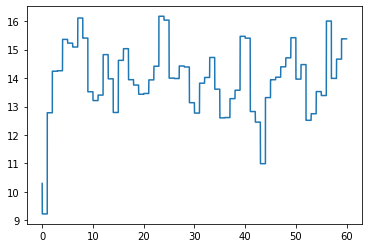

In [27]:
plt.plot(t[:6000], E[:6000])

In [10]:
def radius_of_gyration(r, m):
    
    M = m.sum()
    
    r_cm = (m*r).sum(axis=0) / M
    
    Rg2 = np.linalg.norm(np.sqrt(m) * (r - r_cm))**2 / M
    
    return np.sqrt(Rg2)

In [11]:
def end2end_distance(r):
    return np.linalg.norm(r[-1] - r[0])

In [12]:
m = np.ones([N, 1])
R_g = np.zeros(len(t))
for i in tqdm(range(len(t))):
    R_g[i] = radius_of_gyration(R[i], m)

100%|██████████| 500000/500000 [00:14<00:00, 33431.68it/s]


In [13]:
R_e = np.zeros(len(t))
for i in tqdm(range(len(t))):
    R_e[i] = end2end_distance(R[i])

100%|██████████| 500000/500000 [00:04<00:00, 124452.92it/s]


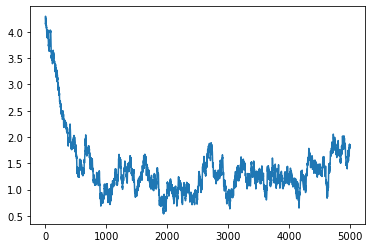

In [14]:
plt.plot(t, R_g)

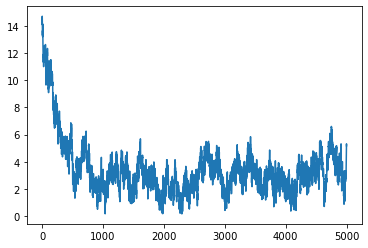

In [15]:
plt.plot(t, R_e)

In [310]:
kb = 1.380649e-23
cv = ((E-E[0])**2).mean() / (N * .1**2)
print(cv)

648.8676705013446
